In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.impute import KNNImputer

In [2]:
# Settings:
pd.set_option('display.width', 190)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.min_rows', 20)
pd.set_option('max_colwidth', 200)
pd.options.display.float_format = '{:.4f}'.format
plt.style.use('default')
np.set_printoptions(threshold = 30, edgeitems = 30, precision = 2, suppress = False)

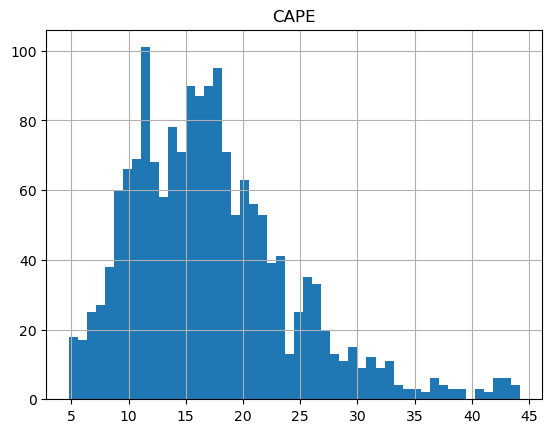

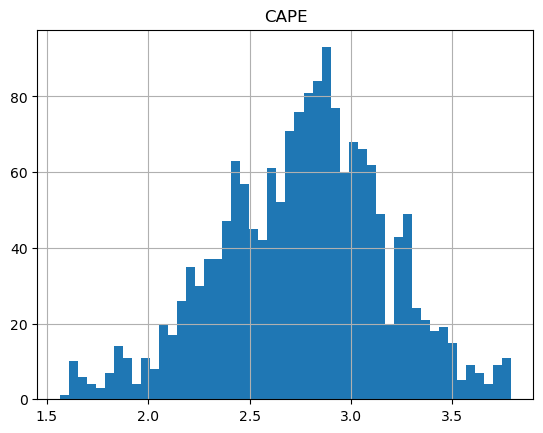

In [3]:
## CAPE
df1 = pd.read_csv("../original_data/Yale IE.csv")
df1 = df1.iloc[3:,[0, 12]].dropna()
df1.columns = ["Date", "CAPE"]
df1.Date = pd.to_datetime(df1.iloc[:,0], format='%Y.%m')
df1 = df1.set_index("Date")
df1.CAPE = df1.CAPE.astype(float)
df1.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
df1.filter(items=['CAPE']).hist(column = 'CAPE', bins = 50) # Histogram without log transformation
# log transformation
df1.CAPE = df1.CAPE.apply(lambda x: np.log(x))
df1.filter(items=['CAPE']).hist(column = 'CAPE', bins = 50) # Histogram after log transformation
df1 = df1.dropna()
df1 = df1.resample(rule="d").first().interpolate(method="time")

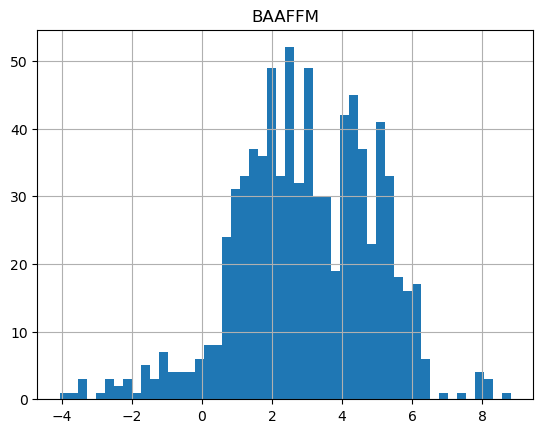

In [4]:
# BAA corporate bonds
df2 = pd.read_csv("../original_data/BAAFFM.csv", na_values=".")
df2.columns = ["Date", "BAAFFM"]
df2.Date = pd.to_datetime(df2.iloc[:,0], format='%Y-%m-%d')
df2.BAAFFM = pd.to_numeric(df2.BAAFFM, errors = 'coerce')
df2 = df2.set_index("Date")
df2.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
df2.BAAFFM = df2.BAAFFM.astype(float)
df2.filter(items=['BAAFFM']).hist(column = 'BAAFFM', bins = 50) # Histogram without log transformation
df2 = df2.resample(rule="d").first().interpolate(method="time")


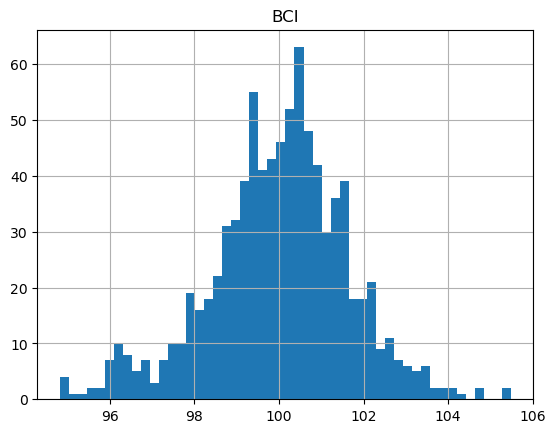

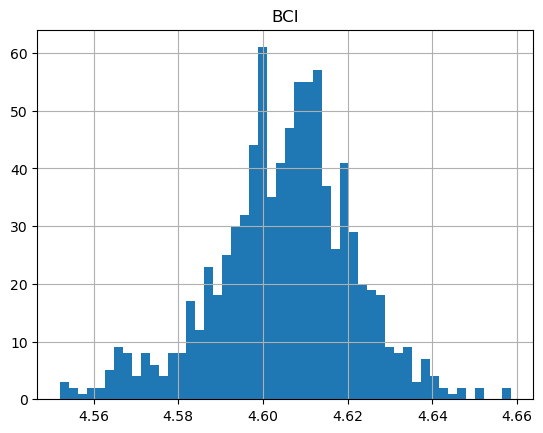

In [5]:
# Business confidence index (BCI)
df3 = pd.read_csv("../original_data/BCI.csv")
df3 = df3[df3.LOCATION == "USA"].iloc[:, [5,6]]
df3.columns = ["Date", "BCI"]
df3.Date = pd.to_datetime(df3.iloc[:,0], format='%Y-%m')
df3 = df3.set_index("Date")
df3.BCI = df3.BCI.astype(float)
df3.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
df3.filter(items=['BCI']).hist(column = 'BCI', bins = 50) # Histogram without log transformation
# log transformation
df3.BCI = df3.BCI.apply(lambda x: np.log(x))
df3.filter(items=['BCI']).hist(column = 'BCI', bins = 50) # Histogram after log transformation
df3 = df3.resample(rule="d").first().interpolate(method="time")


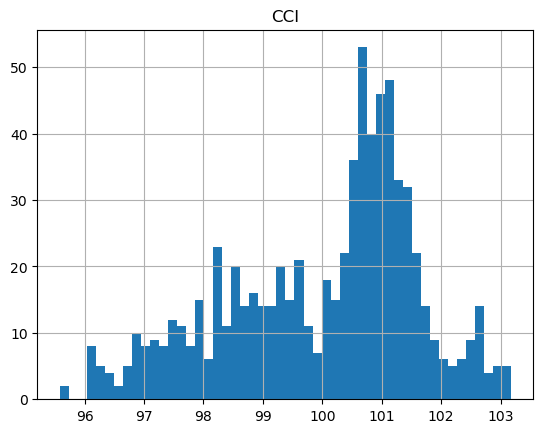

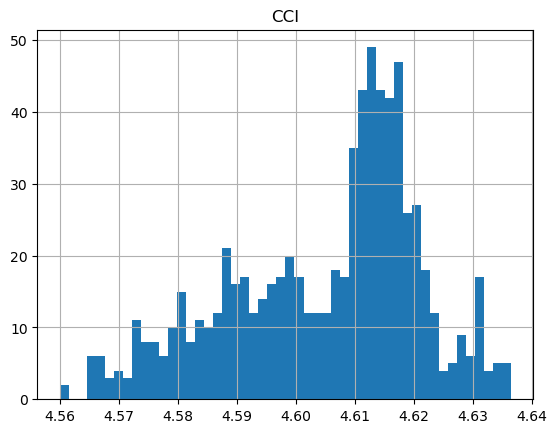

In [6]:
# Consumer confidence index (CCI)
df4 = pd.read_csv("../original_data/CCI.csv")
df4 = df4[df4.LOCATION == "USA"].iloc[:, [5,6]]
df4.columns = ["Date", "CCI"]
df4.Date = pd.to_datetime(df4.iloc[:,0], format='%Y-%m')
df4 = df4.set_index("Date")
df4.CCI = df4.CCI.astype(float)
df4.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
df4.filter(items=['CCI']).hist(column = 'CCI', bins = 50) # Histogram without log transformation
# log transformation
df4.CCI = df4.CCI.apply(lambda x: np.log(x))
df4.filter(items=['CCI']).hist(column = 'CCI', bins = 50) # Histogram after log transformation
df4 = df4.resample(rule="d").first().interpolate(method="time")


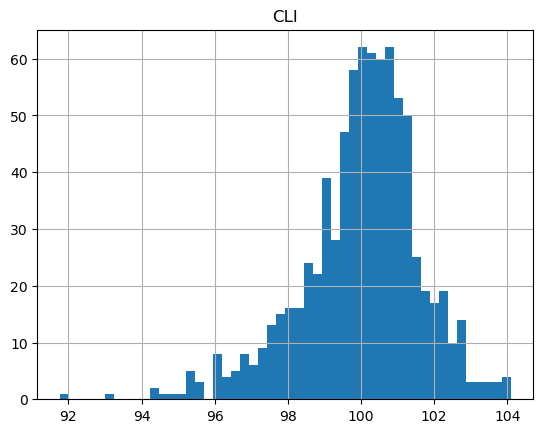

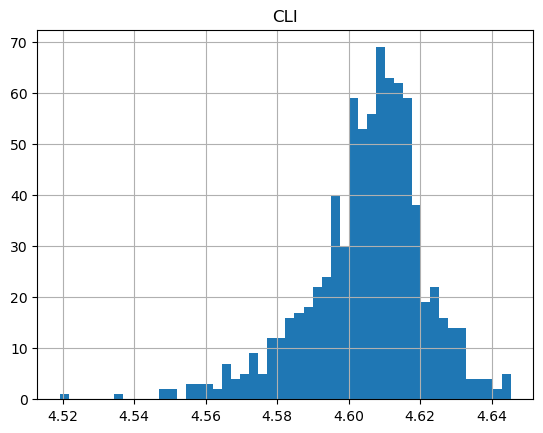

In [7]:
# Composite leading index (CLI)
df5 = pd.read_csv("../original_data/CLI.csv")
df5 = df5[df5.LOCATION == "USA"].iloc[:, [5,6]]
df5.columns = ["Date", "CLI"]
df5.Date = pd.to_datetime(df5.iloc[:,0], format='%Y-%m')
df5 = df5.set_index("Date")
df5.CLI = df5.CLI.astype(float)
df5.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
df5.filter(items=['CLI']).hist(column = 'CLI', bins = 50) # Histogram without log transformation
# log transformation
df5.CLI = df5.CLI.apply(lambda x: np.log(x))
df5.filter(items=['CLI']).hist(column = 'CLI', bins = 50) # Histogram after log transformation
df5 = df5.resample(rule="d").first().interpolate(method="time")


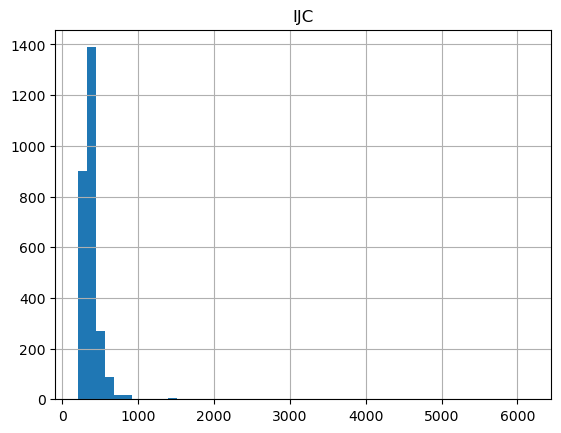

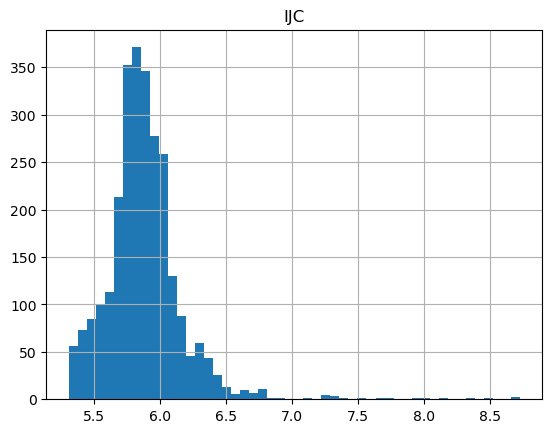

In [8]:
# Initial jobless claims (IJC)
df6 = pd.read_csv("../original_data/Initial jobless claims.csv")
df6 = df6.iloc[:,[3, 4]]
df6.columns = ["Date", "IJC"]
df6.Date = pd.to_datetime(df6.iloc[:,0])
df6 = df6.set_index("Date")
df6.IJC = df6.IJC.astype(float)
df6.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
df6.filter(items=['IJC']).hist(column = 'IJC', bins = 50) # Histogram without log transformation
# log transformation
df6.IJC = df6.IJC.apply(lambda x: np.log(x))
df6.filter(items=['IJC']).hist(column = 'IJC', bins = 50) # Histogram after log transformation
df6 = df6.resample(rule="d").first().interpolate(method="time")


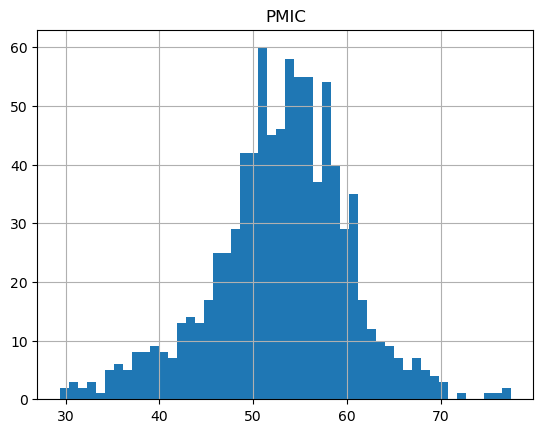

In [9]:
# Purchasing manager index composite (PMIC)
df7 = pd.read_csv("../original_data/PMI_composite.csv")
df7 = df7.iloc[:,[0, 1]]
df7.columns = ["Date", "PMIC"]
df7.Date = pd.to_datetime(df7.iloc[:,0])
df7 = df7.set_index("Date")
df7.PMIC = df7.PMIC.astype(float)
df7.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
df7.filter(items=['PMIC']).hist(column = 'PMIC', bins = 50) # Histogram without log transformation
df7 = df7.resample(rule="d").first().interpolate(method="time")


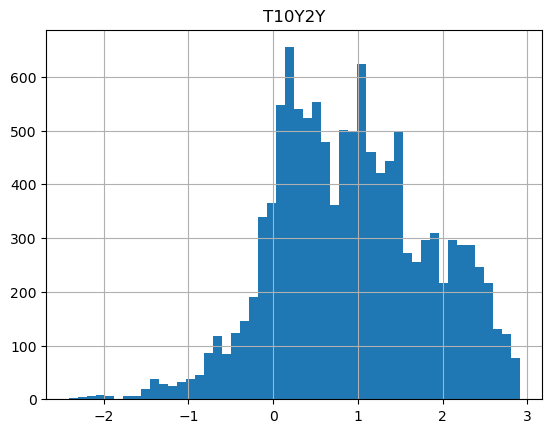

In [10]:
# T-bond 10Y minus 2Y spreads (T10Y2Y)
df8 = pd.read_csv("../original_data/T10Y2Y.csv", na_values=".")
df8 = df8.iloc[:,[0, 1]]
df8.columns = ["Date", "T10Y2Y"]
df8.Date = pd.to_datetime(df8.iloc[:,0])
df8 = df8.set_index("Date")
df8.T10Y2Y = df8.T10Y2Y.astype(float)
df8.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
df8.filter(items=['T10Y2Y']).hist(column = 'T10Y2Y', bins = 50) # Histogram without log transformation
df8 = df8.resample(rule="d").first().interpolate(method="time")


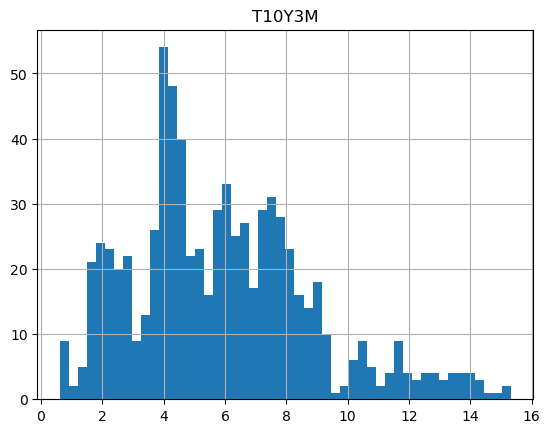

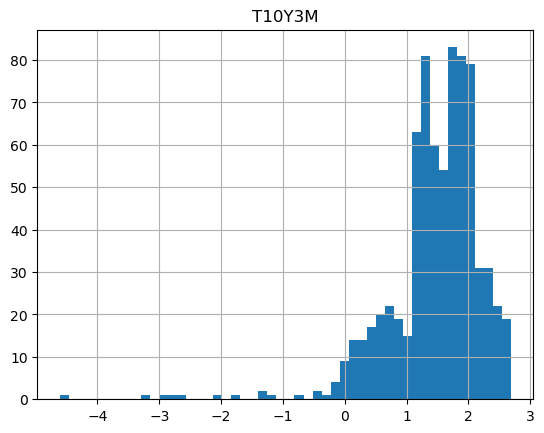

In [11]:
# T-bond 10Y minus 3M spreads (T10Y3M)
df9 = pd.read_csv("../original_data/T10Y3M.csv", na_values=".")
df9 = df9.iloc[:,[0, 1]]
df9.columns = ["Date", "T10Y3M"]
df9.Date = pd.to_datetime(df9.iloc[:,0])
df9 = df9.set_index("Date")
df9.T10Y3M = df9.T10Y3M.astype(float)
df9.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
df9.filter(items=['T10Y3M']).hist(column = 'T10Y3M', bins = 50) # Histogram without log transformation# log transformation
minimum = min(df9.T10Y3M)
df9.T10Y3M = df9.T10Y3M.apply(lambda x: np.log(x - minimum + 0.01))
df9.filter(items=['T10Y3M']).hist(column = 'T10Y3M', bins = 50) # Histogram after log transformation
df9 = df9.resample(rule="d").first().interpolate(method="time")


In [12]:
## Target variable #1: recession (0 or 1)
usrescd = pd.read_csv("../original_data/USRECD.csv", parse_dates=["DATE"])
usrescd = usrescd.rename({"DATE": "Date"}, axis=1)
usrescd.Date = pd.to_datetime(usrescd.Date)
usrescd = usrescd.set_index("Date")
usrescd = usrescd.resample(rule="d").first().interpolate(method="nearest")


In [13]:
## Target variable #2: GDP absolute
# gdpa = pd.read_csv("../original_data/gdp_m.csv")
# gdpa = gdpa.rename({"date": "Date", "gdp": "GDP_abs"}, axis=1)
# gdpa.Date = pd.to_datetime(gdpa.Date)
# gdpa = gdpa.drop(columns=['year'])
# gdpa = gdpa.set_index("Date")
# gdpa.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
# gdpa.filter(items=['GDP_abs']).hist(column = 'GDP_abs', bins = 50) # Histogram before upsampling
# gdpa = gdpa.resample(rule="d").first().interpolate(method="time")


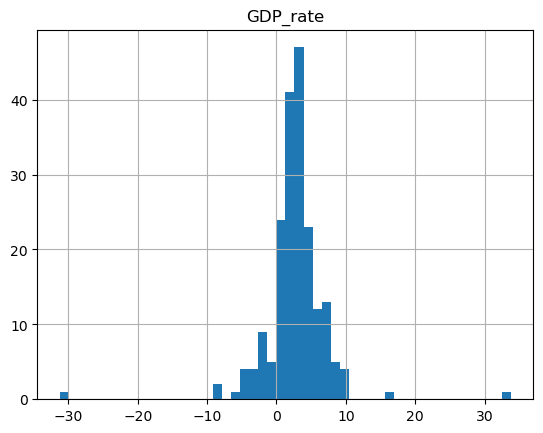

In [14]:
## Target variable #3: GDP growth rate
gdpgr = pd.read_csv("../original_data/united-states-gdp-growth-rate.csv")
gdpgr.columns = ["Date", "GDP_rate"]
gdpgr = gdpgr.iloc[100:,] # For some reason early years are interpreted wrongly, like 1947 -> 2047, so just drop 100 first rows, which are not needed anyway.
gdpgr.Date = pd.to_datetime(gdpgr.Date)
gdpgr = gdpgr.set_index("Date")
gdpgr.interpolate(method="time", inplace=True) # Impute an interpolated value to replace NaNs
gdpgr.filter(items=['GDP_rate']).hist(column = 'GDP_rate', bins = 50) # Histogram before upsampling
gdpgr = gdpgr.resample(rule="d").first().interpolate(method="time")


In [15]:
df = usrescd
df = pd.merge(df, df1, on="Date")
df = pd.merge(df, df2, on="Date")
df = pd.merge(df, df3, on="Date")
df = pd.merge(df, df4, on="Date")
df = pd.merge(df, df5, on="Date")
df = pd.merge(df, df6, on="Date")
df = pd.merge(df, df7, on="Date")
df = pd.merge(df, df8, on="Date")
df = pd.merge(df, df9, on="Date")


In [16]:
df.tail()

,USRECD,CAPE,BAAFFM,BCI,CCI,CLI,IJC,PMIC,T10Y2Y,T10Y3M
Date,,,,,,,,,,
2021-08-27,0,3.6454,3.1500,4.6224,4.5829,4.6101,5.8472,60.9065,1.0900,-0.3930
2021-08-28,0,3.6456,3.1500,4.6225,4.5827,4.6101,5.8435,60.9452,1.0900,-0.3949
2021-08-29,0,3.6459,3.1500,4.6225,4.5825,4.6101,5.8292,60.9839,1.0900,-0.3967
2021-08-30,0,3.6461,3.1500,4.6225,4.5823,4.6100,5.8148,61.0226,1.0900,-0.3986
2021-08-31,0,3.6463,3.1500,4.6226,4.5821,4.6100,5.8005,61.0613,1.1000,-0.4005


In [17]:
df.to_csv("../merged_data/CAPE_BAAFFM_BCI_CCI_CLI_IJC_PMIC_T10Y2Y_T10Y3M_vs_USRESCD.csv")

In [18]:
df = gdpgr
df = pd.merge(df, df1, on="Date")
df = pd.merge(df, df2, on="Date")
df = pd.merge(df, df3, on="Date")
df = pd.merge(df, df4, on="Date")
df = pd.merge(df, df5, on="Date")
df = pd.merge(df, df6, on="Date")
df = pd.merge(df, df7, on="Date")
df = pd.merge(df, df8, on="Date")
df = pd.merge(df, df9, on="Date")


In [19]:
df.tail()

,GDP_rate,CAPE,BAAFFM,BCI,CCI,CLI,IJC,PMIC,T10Y2Y,T10Y3M
Date,,,,,,,,,,
2021-06-26,6.6824,3.6194,3.1767,4.6212,4.5963,4.6103,5.9081,59.6833,1.2533,-0.0804
2021-06-27,6.6868,3.6201,3.1693,4.6212,4.5961,4.6103,5.9149,59.6467,1.2467,-0.0839
2021-06-28,6.6912,3.6207,3.1620,4.6212,4.5959,4.6103,5.9217,59.6100,1.2400,-0.0874
2021-06-29,6.6956,3.6214,3.1547,4.6211,4.5957,4.6103,5.9285,59.5733,1.2200,-0.0908
2021-06-30,6.7000,3.6221,3.1473,4.6211,4.5955,4.6103,5.9354,59.5367,1.2000,-0.0943


In [20]:
df.to_csv("../merged_data/CAPE_BAAFFM_BCI_CCI_CLI_IJC_PMIC_T10Y2Y_T10Y3M_vs_GDP.csv")